In [16]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widjets
%matplotlib inline

import numpy as np
from torchvision import datasets, models, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt

import os
import shutil
import cv2
from copy import deepcopy

from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from time import time
from tqdm import tqdm, tqdm_notebook

from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn import metrics
import json
from pathlib import Path

In [21]:
annotation = pd.read_csv(r'Q:\Downloads\stanford_campus_dataset\annotations\nexus\video3\annotations.txt', header=None, delimiter=' ')

In [66]:
annotation[5].max()

1061

In [58]:
ann = annotation
# ann[(ann[5]==950) & (ann[6]!=1) & (ann[7]!=1)]
ann[ann[8]==0][5]

0         500
270       770
313       813
333       833
369       869
         ... 
34556     580
34567     591
34580     604
34599     623
35007    1031
Name: 5, Length: 640, dtype: int64

In [68]:
ann[ann[5]==62]

,0,1,2,3,4,5,6,7,8,9
624,1,391,1004,414,1048,62,1,0,1,Pedestrian
3372,5,9,978,36,1015,62,1,0,1,Pedestrian
4434,6,223,916,246,971,62,1,0,1,Pedestrian
5558,8,44,967,82,1018,62,1,0,1,Pedestrian
6620,9,1100,982,1123,1033,62,1,0,1,Pedestrian
8244,11,499,1678,534,1737,62,1,0,1,Pedestrian
9306,12,600,842,633,897,62,1,0,1,Pedestrian
10368,13,1160,930,1182,993,62,1,0,1,Pedestrian
11430,14,861,883,878,908,62,1,0,1,Pedestrian
12492,15,858,912,884,945,62,1,0,1,Pedestrian


In [15]:
video = cv2.VideoCapture(r'Q:\Downloads\stanford_campus_dataset\videos\nexus\video3\video.mov')
fps = int(video.get(cv2.CAP_PROP_FPS))
print(fps)
print(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(video.get(cv2.CAP_PROP_POS_FRAMES))

index = 0
success = True
frames = []
while success and index < 10:
    index += 1
#     if index % fps == 0:
    video.set(cv2.CAP_PROP_POS_FRAMES, index)
    success, frame = video.read()
    frames.append(frame)
    print(video.get(cv2.CAP_PROP_FRAME_COUNT))
    print(video.get(cv2.CAP_PROP_POS_FRAMES))
    print()

29
1062.0
0.0
1062.0
2.0

1062.0
3.0

1062.0
4.0

1062.0
5.0

1062.0
6.0

1062.0
7.0

1062.0
8.0

1062.0
9.0

1062.0
10.0

1062.0
11.0



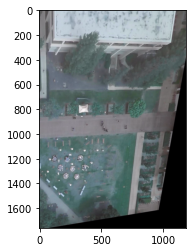

In [27]:
index=950
video.set(cv2.CAP_PROP_POS_FRAMES, index)
success, frame = video.read()
plt.imshow(frame)

In [69]:
@interact(i=(0,video.get(cv2.CAP_PROP_FRAME_COUNT),1))
def tst(i=0):

    index = i
    ann = annotation

    video.set(cv2.CAP_PROP_POS_FRAMES, index)
    success, frame = video.read()

    elems = ann[(ann[5]==index)  & (ann[7]!=1)] #& (ann[6]!=1)
    for index, row in elems.iterrows():
        xmin, ymin, xmax, ymax = row[1], row[2], row[3], row[4]
        frame = cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), color=(255,255,0), thickness=2)


    plt.figure(figsize=(10,15
                       ))
    plt.imshow(frame)

interactive(children=(FloatSlider(value=0.0, description='i', max=1062.0, step=1.0), Output()), _dom_classes=(…

In [93]:
annotation = pd.read_csv(r'Q:\Downloads\stanford_campus_dataset\annotations\bookstore\video1\annotations.txt', header=None, delimiter=' ')

In [100]:
ann = annotation 
ann[(ann[1]==1315)  & (ann[2]==982) & (ann[3]==1344)]

,0,1,2,3,4,5,6,7,8,9
190830,196,1315,982,1344,1020,8220,0,0,1,Pedestrian


In [96]:
ann[(ann[1]==35)]

,0,1,2,3,4,5,6,7,8,9


In [154]:
a = ['b', 'c', 'a']
b = [31, 11, 21]
c = ['c', 'a', 'b']  # Сортировка a по ключу b
c

['c', 'a', 'b']

In [157]:
sorted(a, key=lambda b:b)

['a', 'b', 'c']

In [7]:
a = cv2.imread('test_markers.png', 0)

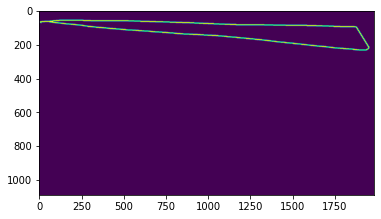

In [12]:
plt.imshow(a==3)

In [26]:
SDD_path = r'Q:\Downloads\stanford_campus_dataset\annotations'
references = list(Path(SDD_path).glob(r'*\*\reference.jpg'))

@interact(i=(0,len(references)-1, 1))
def tst(i):
    plt.figure(figsize=(20,20))
    img = cv2.imread(str(references[i]))[:,:,::-1]
    plt.imshow(img)

interactive(children=(IntSlider(value=29, description='i', max=59), Output()), _dom_classes=('widget-interact'…

In [24]:
references[0].parent.joinpath('masrkers.png').is_file()

False